In [1]:
import os
import datetime
import shutil
import sqlite3
print(os.listdir())

['.ipynb_checkpoints', '0325실습.ipynb', '20210325실습용코드.txt', '4주 실습.ipynb', 'DBTest.ipynb', 'Django_test', 'gugu.txt', 'GUGUDAN.ipynb', 'Incheon.csv', 'Incheon_Temperature.ipynb', 'MBN00003U_10_2012.csv', 'Merge_최종본.ipynb', 'mywebsite', 'passenger.txt', 'seoul.csv', 'SeoulCsvTest.ipynb', 'Seoul_temp.csv', 'Seoul_test.csv', 'SortAlghorithm.ipynb', 'ta_20210325112903.csv', 'test.db', 'travel.csv', 'w02ex.ipynb', '실습문제.ipynb']


In [2]:
print(os.listdir())
print(os.getcwd())

['.ipynb_checkpoints', '0325실습.ipynb', '20210325실습용코드.txt', '4주 실습.ipynb', 'DBTest.ipynb', 'Django_test', 'gugu.txt', 'GUGUDAN.ipynb', 'Incheon.csv', 'Incheon_Temperature.ipynb', 'MBN00003U_10_2012.csv', 'Merge_최종본.ipynb', 'mywebsite', 'passenger.txt', 'seoul.csv', 'SeoulCsvTest.ipynb', 'Seoul_temp.csv', 'Seoul_test.csv', 'SortAlghorithm.ipynb', 'ta_20210325112903.csv', 'test.db', 'travel.csv', 'w02ex.ipynb', '실습문제.ipynb']
C:\JupyterNote


In [3]:
# CRUD- DROP 
import sqlite3
con =sqlite3.connect('test.db')
cur = con.cursor()
sql = "DROP TABLE IF EXISTS temperature"
cur.execute(sql)
con.commit()
con.close()

In [4]:
# CRUD- CREATE
con = sqlite3.connect('test.db')
cur = con.cursor()
sql = "CREATE TABLE IF NOT EXISTS temperature(date text, point float, avgtemp float, mintemp float, maxtemp float)"
cur.execute(sql)
con.commit()
con.close()
print("con",con)
print("cur",cur)

con <sqlite3.Connection object at 0x0000025BF1307A80>
cur <sqlite3.Cursor object at 0x0000025BF13E56C0>


In [5]:
# 데이터 가공
import csv
def opencsv(filename):
    with open(filename, 'rt', encoding='utf-8') as f:
        reader = csv.reader(f)
        output = []
        for i in reader:
            output.append(i)
        return output
data = opencsv("Seoul_test.csv")
data = tuple(data)
print("파일 읽기",data)

파일 읽기 (['2021-02-23', '108', '0', '-3.1', '4.3'], ['2021-02-24', '108', '2.9', '-3', '10.1'], ['2021-02-25', '108', '4.2', '0.7', '8.2'], ['2021-02-26', '108', '8.2', '0.5', '15.8'], ['2021-02-27', '108', '9.5', '4.3', '16.2'], ['2021-02-28', '108', '7.8', '3.2', '10.8'], ['2021-03-01', '108', '4.7', '0.5', '9'], ['2021-03-02', '108', '2.3', '0.2', '6.9'], ['2021-03-03', '108', '4.4', '-1.2', '9.9'], ['2021-03-04', '108', '7.2', '2.5', '13'], ['2021-03-05', '108', '9', '3', '16.2'], ['2021-03-06', '108', '6.6', '3.2', '11.6'], ['2021-03-07', '108', '6.2', '2.1', '12.2'], ['2021-03-08', '108', '7', '1.5', '13.9'], ['2021-03-09', '108', '6.6', '2.1', '12.2'], ['2021-03-10', '108', '8.8', '1.7', '17.1'], ['2021-03-11', '108', '10.2', '4.7', '17.1'], ['2021-03-12', '108', '10.5', '7.2', '14.9'], ['2021-03-13', '108', '9.2', '4.6', '14.2'], ['2021-03-14', '108', '9.1', '4.9', '14.7'], ['2021-03-15', '108', '10.6', '5.1', '15.7'], ['2021-03-16', '108', '8.4', '4.9', '13.1'], ['2021-03-17', '

In [6]:
# CRUD - INSERT 데이터 입력
con = sqlite3.connect('test.db')
cur = con.cursor()
sql = "INSERT INTO temperature VALUES(?,?,?,?,?)"
cur.executemany(sql,data)
con.commit()
con.close()

In [7]:
# CRUD- UPDATE 데이터 갱신
con = sqlite3.connect('test.db')
cur = con.cursor()
sql = "UPDATE temperature SET point = ? WHERE point = ?"
data = ('106','108')
cur.execute(sql,data)
con.commit()
con.close()

In [8]:
# 데이터 프레임에 데이터를 추가하기 위한 가공과정.
con = sqlite3.connect('test.db')
cur = con.cursor()
sql = "SELECT * From temperature"
cur.execute(sql)
my_list = []
row = cur.fetchone()
while row !=None:
    my_list.append(row)
    print(row)
    # fetchone()을 통해 한 줄을 읽고 나서면 커서가 다음 줄을 가리키고 있으므로 
    # 다시 fetchone()을 호출해 다음 줄을 가져온다.
    row = cur.fetchone() 
con.close()


('2021-02-23', 106.0, 0.0, -3.1, 4.3)
('2021-02-24', 106.0, 2.9, -3.0, 10.1)
('2021-02-25', 106.0, 4.2, 0.7, 8.2)
('2021-02-26', 106.0, 8.2, 0.5, 15.8)
('2021-02-27', 106.0, 9.5, 4.3, 16.2)
('2021-02-28', 106.0, 7.8, 3.2, 10.8)
('2021-03-01', 106.0, 4.7, 0.5, 9.0)
('2021-03-02', 106.0, 2.3, 0.2, 6.9)
('2021-03-03', 106.0, 4.4, -1.2, 9.9)
('2021-03-04', 106.0, 7.2, 2.5, 13.0)
('2021-03-05', 106.0, 9.0, 3.0, 16.2)
('2021-03-06', 106.0, 6.6, 3.2, 11.6)
('2021-03-07', 106.0, 6.2, 2.1, 12.2)
('2021-03-08', 106.0, 7.0, 1.5, 13.9)
('2021-03-09', 106.0, 6.6, 2.1, 12.2)
('2021-03-10', 106.0, 8.8, 1.7, 17.1)
('2021-03-11', 106.0, 10.2, 4.7, 17.1)
('2021-03-12', 106.0, 10.5, 7.2, 14.9)
('2021-03-13', 106.0, 9.2, 4.6, 14.2)
('2021-03-14', 106.0, 9.1, 4.9, 14.7)
('2021-03-15', 106.0, 10.6, 5.1, 15.7)
('2021-03-16', 106.0, 8.4, 4.9, 13.1)
('2021-03-17', 106.0, 8.8, 1.8, 17.5)
('2021-03-18', 106.0, 11.7, 5.0, 18.4)
('2021-03-19', 106.0, 15.3, 11.4, 20.2)
('2021-03-20', 106.0, 9.9, 7.4, 14.7)
('2021-0

In [18]:
import pandas as pd
df = pd.DataFrame(my_list, columns = ['Date' , 'Point', 'Avg_temp' , 'Min_temp','Max_temp'])
df

,Date,Point,Avg_temp,Min_temp,Max_temp
0,2021-02-23,106.0,0.0,-3.1,4.3
1,2021-02-24,106.0,2.9,-3.0,10.1
2,2021-02-25,106.0,4.2,0.7,8.2
3,2021-02-26,106.0,8.2,0.5,15.8
4,2021-02-27,106.0,9.5,4.3,16.2
5,2021-02-28,106.0,7.8,3.2,10.8
6,2021-03-01,106.0,4.7,0.5,9.0
7,2021-03-02,106.0,2.3,0.2,6.9
8,2021-03-03,106.0,4.4,-1.2,9.9
9,2021-03-04,106.0,7.2,2.5,13.0


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df2['Avg_temp'] = round(df2['Avg_temp']/7,1)
print(df2['Date'])
print(df2['Avg_temp'])
df2.drop(['Point','Min_temp','Max_temp'],axis=1,inplace=True)
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      30 non-null     datetime64[ns]
 1   Point     30 non-null     float64       
 2   Avg_temp  30 non-null     float64       
 3   Min_temp  30 non-null     float64       
 4   Max_temp  30 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.3 KB
0   2021-02-28
1   2021-03-07
2   2021-03-14
3   2021-03-21
4   2021-03-28
Name: Date, dtype: datetime64[ns]
0     4.7
1     5.8
2     8.8
3    10.1
4     3.7
Name: Avg_temp, dtype: float64


,Date,Avg_temp
0,2021-02-28,4.7
1,2021-03-07,5.8
2,2021-03-14,8.8
3,2021-03-21,10.1
4,2021-03-28,3.7


<AxesSubplot:>

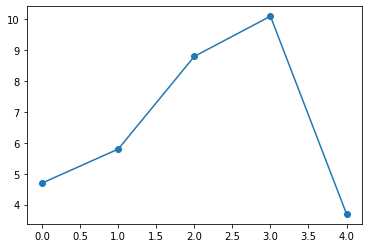

In [42]:
# 평균온도 추세선
from matplotlib import pyplot as plt
df2['Avg_temp'].plot(marker='o')